In [10]:
import os
import sys

from matplotlib import pyplot as plt
import matplotlib.patches as mpatch
import numpy as np
from scipy.integrate import dblquad
from scipy.stats import multivariate_normal
import pathlib 

CWD = pathlib.Path(os.path.abspath("")).parent
sys.path.append(os.path.join(CWD, ".."))
from notebooks.plt_settings import plt_settings

full_width = 5.5
ratio = 1 / 1.618

In [14]:
ITERATIONS = int(5e5)
BURN_IN = int(2e5)

sampling_data = np.load(os.path.join(CWD, "data\\results\\2d_gaussian.npz"))
pdlmc_samples_all = sampling_data["pdlmc_x"]
pdlmc_samples = pdlmc_samples_all[BURN_IN:]
pdlmc_lambda = sampling_data["pdlmc_lambda"]
pdlmc_nu = sampling_data["pdlmc_nu"]

In [15]:
# True mean
Z, _ = dblquad(
    lambda y, x: multivariate_normal.pdf([x, y], mean=np.ones(2) * 2),
    -0.5,
    0.5,
    lambda x: -np.sqrt(4 - 16*x**2),
    lambda x: np.sqrt(4 - 16*x**2),
)
true_mean_x, _ = dblquad(
    lambda y, x: x * multivariate_normal.pdf([x, y], mean=np.ones(2) * 2),
    -0.5,
    0.5,
    lambda x: -np.sqrt(4 - 16*x**2),
    lambda x: np.sqrt(4 - 16*x**2),
)

true_mean_y, _ = dblquad(
    lambda y, x: y * multivariate_normal.pdf([x, y], mean=np.ones(2) * 2),
    -0.5,
    0.5,
    lambda x: -np.sqrt(4 - 16*x**2),
    lambda x: np.sqrt(4 - 16*x**2),
)

true_mean = np.array([true_mean_x / Z, true_mean_y / Z])
print(f"Mean of the distribution: {true_mean}")

# Estimated mean
pdlmc_mean = pdlmc_samples.mean(axis=0)

print(f"Estimated mean via PD-LMC: {pdlmc_mean}")

Mean of the distribution: [0.10155644 1.01212655]
Estimated mean via PD-LMC: [nan nan]


C:\Users\thiag\AppData\Local\Temp\ipykernel_20540\3824111477.py:29: RuntimeWarning: Mean of empty slice.
  pdlmc_mean = pdlmc_samples.mean(axis=0)
c:\Users\thiag\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


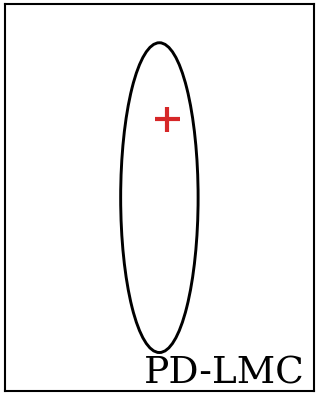

In [16]:
plt_settings["figure.figsize"] = (full_width, full_width / 4)
scatter_kwargs = {
    "s": 20.0,
    "edgecolors": "face",
    "alpha": 0.03,
    "linewidth": 0.0,
}

with plt.rc_context(plt_settings):
    _, ax = plt.subplots(dpi=300)
    ax.scatter(pdlmc_samples[::200, 0], pdlmc_samples[::200, 1], **scatter_kwargs)

    ax.scatter(
        [pdlmc_mean[0]], [pdlmc_mean[1]], marker="x", color="C1", label="Estimated mean"
    )
    ax.scatter(
        [true_mean[0]], [true_mean[1]], marker="+", color="C3", label="True mean"
    )

   
    ax.add_artist(mpatch.Ellipse(xy=(0.0, 0.0), width=1.0, height=4.0, edgecolor='k',
                  facecolor='none', lw=0.7))
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2.5, 2.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect(1)
    ax.grid()

    # Title
    ax.set_title("PD-LMC", loc="right", x=0.97, y=0.02, pad=0)

    plt.show()

In [ ]:
ITERATIONS = int(5e5)
BURN_IN = int(3e5)

sampling_data = np.load(os.path.join(CWD, "data/results/2d_gaussian_circle.npz"))
pdlmc_samples_all = sampling_data["pdlmc_x"]
pdlmc_samples = pdlmc_samples_all[BURN_IN:]
pdlmc_lambda = sampling_data["pdlmc_lambda"]
pdlmc_nu = sampling_data["pdlmc_nu"]

In [127]:
# True mean
Z, _ = dblquad(
    lambda y, x: multivariate_normal.pdf([x, y], mean=np.ones(2) * 2),
    -1,
    1,
    lambda x: -np.sqrt(1-x**2),
    lambda x: np.sqrt(1-x**2),
)
true_mean_x, _ = dblquad(
    lambda y, x: x * multivariate_normal.pdf([x, y], mean=np.ones(2) * 2),
    -1,
    1,
    lambda x: -np.sqrt(1-x**2),
    lambda x: np.sqrt(1-x**2),
)


true_mean = np.array([true_mean_x / Z, true_mean_x / Z])
print(f"Mean of the distribution: {true_mean}")

# Estimated mean
pdlmc_mean = pdlmc_samples.mean(axis=0)

print(f"Estimated mean via PD-LMC: {pdlmc_mean}")

# Out-of-support samples
out_of_support = ((pdlmc_samples * pdlmc_samples).sum(axis=1) > 1).mean()
print(f"Percentage of out-of-support samples: {out_of_support * 100:.2f}%")

# overestimation of boundary
pdlmc_samples_norm = (pdlmc_samples * pdlmc_samples).sum(axis=1)
pdlmc_boundary = np.logical_and(
    pdlmc_samples_norm >= 1 - 1e-3, pdlmc_samples_norm <= 1
).mean()

print(f"PD-LMC - Percentage of samples on boundary: {pdlmc_boundary * 100:.2f}%")

Mean of the distribution: [0.36799429 0.36799429]
Estimated mean via PD-LMC: [0.36741892 0.3680973 ]
Percentage of out-of-support samples: 2.44%
PD-LMC - Percentage of samples on boundary: 0.02%


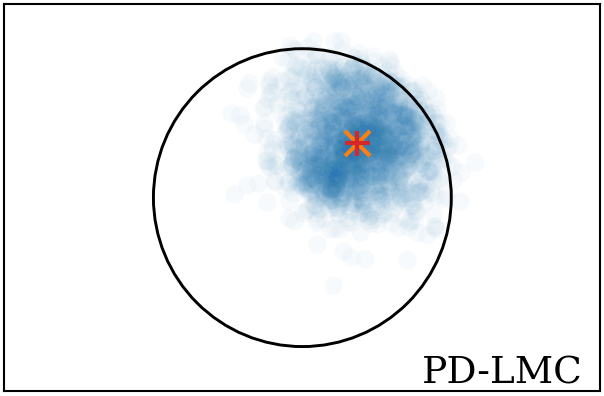

In [ ]:
plt_settings["figure.figsize"] = (full_width, full_width / 4)
scatter_kwargs = {
    "s": 20.0,
    "edgecolors": "face",
    "alpha": 0.03,
    "linewidth": 0.0,
}

with plt.rc_context(plt_settings):
    _, ax = plt.subplots(dpi=300)
    ax.scatter(pdlmc_samples[::100, 0], pdlmc_samples[::100, 1], **scatter_kwargs)

    # for i, m in enumerate([pdlmc_mean, projlmc_mean, mirror_mean[0.001], rejection_mean]):
    ax.scatter(
        [pdlmc_mean[0]], [pdlmc_mean[1]], marker="x", color="C1", label="Estimated mean"
    )
    ax.scatter(
        [true_mean[0]], [true_mean[1]], marker="+", color="C3", label="True mean"
    )

    ax.add_artist(
        mpatch.Circle((0.0, 0.0), 1.0, facecolor="none", edgecolor="k", lw=0.7)
    )
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-1.3, 1.3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect(1)
    ax.grid()

    # Title
    ax.set_title("PD-LMC", loc="right", x=0.97, y=0.02, pad=0)

    plt.show()